In [32]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


from itertools import cycle, islice

from sklearn.preprocessing import StandardScaler, LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.linear_model import Lasso #Lasso regression model
from sklearn.linear_model import Ridge #Ridge Regression Model
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model
from sklearn.metrics import mean_absolute_error 

from sklearn.cluster import KMeans

In [3]:
spotify = pd.read_csv('Cleaned_SpotifyFeatures-Copy1.csv')#, encoding='ISO-8859-1')

In [4]:
spotify.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,13,0.234,0.617,0.862,0.976000,0.1410,-12.855,1,0.0514,129.578,...,0,0,0,0,0,0,0,0,1,0
1,5,0.249,0.518,0.805,0.000000,0.3330,-6.248,1,0.0407,79.124,...,0,0,0,0,0,0,1,0,0,0
2,30,0.366,0.631,0.513,0.000004,0.1090,-6.376,1,0.0293,120.365,...,0,0,0,1,0,0,0,0,0,0
3,39,0.815,0.768,0.137,0.922000,0.1130,-13.284,0,0.0747,76.430,...,0,0,1,0,0,0,0,0,0,0
4,70,0.131,0.748,0.627,0.000000,0.0852,-6.029,1,0.0644,120.963,...,0,0,0,0,0,0,0,0,1,0


In [22]:
spotify.shape

(191056, 50)

In [23]:
spotify.isnull().sum()

popularity                0
acousticness              0
danceability              0
energy                    0
instrumentalness          0
liveness                  0
loudness                  0
mode                      0
speechiness               0
tempo                     0
time_signature            0
valence                   0
genre_A Capella           0
genre_Alternative         0
genre_Anime               0
genre_Blues               0
genre_Children's Music    0
genre_Children’s Music    0
genre_Classical           0
genre_Comedy              0
genre_Country             0
genre_Dance               0
genre_Electronic          0
genre_Folk                0
genre_Hip-Hop             0
genre_Indie               0
genre_Jazz                0
genre_Movie               0
genre_Opera               0
genre_Pop                 0
genre_R&B                 0
genre_Rap                 0
genre_Reggae              0
genre_Reggaeton           0
genre_Rock                0
genre_Ska           

In [24]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191056 entries, 0 to 191055
Data columns (total 50 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   popularity              191056 non-null  int64  
 1   acousticness            191056 non-null  float64
 2   danceability            191056 non-null  float64
 3   energy                  191056 non-null  float64
 4   instrumentalness        191056 non-null  float64
 5   liveness                191056 non-null  float64
 6   loudness                191056 non-null  float64
 7   mode                    191056 non-null  int64  
 8   speechiness             191056 non-null  float64
 9   tempo                   191056 non-null  float64
 10  time_signature          191056 non-null  float64
 11  valence                 191056 non-null  float64
 12  genre_A Capella         191056 non-null  int64  
 13  genre_Alternative       191056 non-null  int64  
 14  genre_Anime         

In [25]:
spotify.duplicated().sum()

93

In [26]:
spotify.sort_values('popularity', ascending = False).head(10)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
26315,100,0.5780,0.725,0.321,0.000000,0.0884,-10.744,0,0.3230,70.142,...,0,0,1,0,0,0,0,0,0,0
156214,99,0.1630,0.833,0.539,0.000002,0.1010,-7.399,0,0.1780,99.947,...,1,0,0,0,0,0,0,0,0,0
116777,99,0.0421,0.726,0.554,0.000000,0.1060,-5.290,0,0.0917,169.999,...,0,0,0,0,0,0,1,0,0,0
145882,98,0.1100,0.737,0.860,0.000002,0.0574,-2.652,0,0.0593,93.989,...,0,0,0,0,0,0,0,0,0,1
81894,97,0.5560,0.760,0.479,0.000000,0.0703,-5.574,1,0.0466,89.911,...,0,0,0,1,0,0,0,0,0,0
157962,97,0.4500,0.741,0.520,0.000002,0.2220,-7.513,1,0.0656,102.998,...,0,0,0,0,0,0,0,0,0,1
51328,97,0.0691,0.719,0.704,0.000000,0.1660,-4.724,1,0.0476,133.002,...,0,0,1,0,0,0,0,0,0,0
64844,97,0.1910,0.687,0.792,0.000000,0.1670,-2.749,1,0.0452,100.015,...,0,0,0,0,0,0,1,0,0,0
143086,97,0.2970,0.752,0.488,0.000009,0.0936,-7.050,1,0.0705,136.041,...,0,0,0,0,0,0,0,1,0,0
140622,97,0.3230,0.826,0.773,0.000000,0.1430,-4.218,0,0.0524,126.899,...,1,0,0,0,0,0,0,0,0,0


In [27]:
popular = spotify.query('popularity>90', inplace = False).sort_values('popularity', ascending = False )

In [28]:
popular.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
26315,100,0.5780,0.725,0.321,0.000000,0.0884,-10.744,0,0.3230,70.142,...,0,0,1,0,0,0,0,0,0,0
116777,99,0.0421,0.726,0.554,0.000000,0.1060,-5.290,0,0.0917,169.999,...,0,0,0,0,0,0,1,0,0,0
156214,99,0.1630,0.833,0.539,0.000002,0.1010,-7.399,0,0.1780,99.947,...,1,0,0,0,0,0,0,0,0,0
145882,98,0.1100,0.737,0.860,0.000002,0.0574,-2.652,0,0.0593,93.989,...,0,0,0,0,0,0,0,0,0,1
64844,97,0.1910,0.687,0.792,0.000000,0.1670,-2.749,1,0.0452,100.015,...,0,0,0,0,0,0,1,0,0,0


In [29]:
popular.shape

(61, 50)

In [31]:
spotify_sample = spotify.sample(int(0.004*len(spotify)))

In [32]:
print(len(spotify_sample))

764


[Text(0.5, 1.0, 'Loudness vs Energy')]

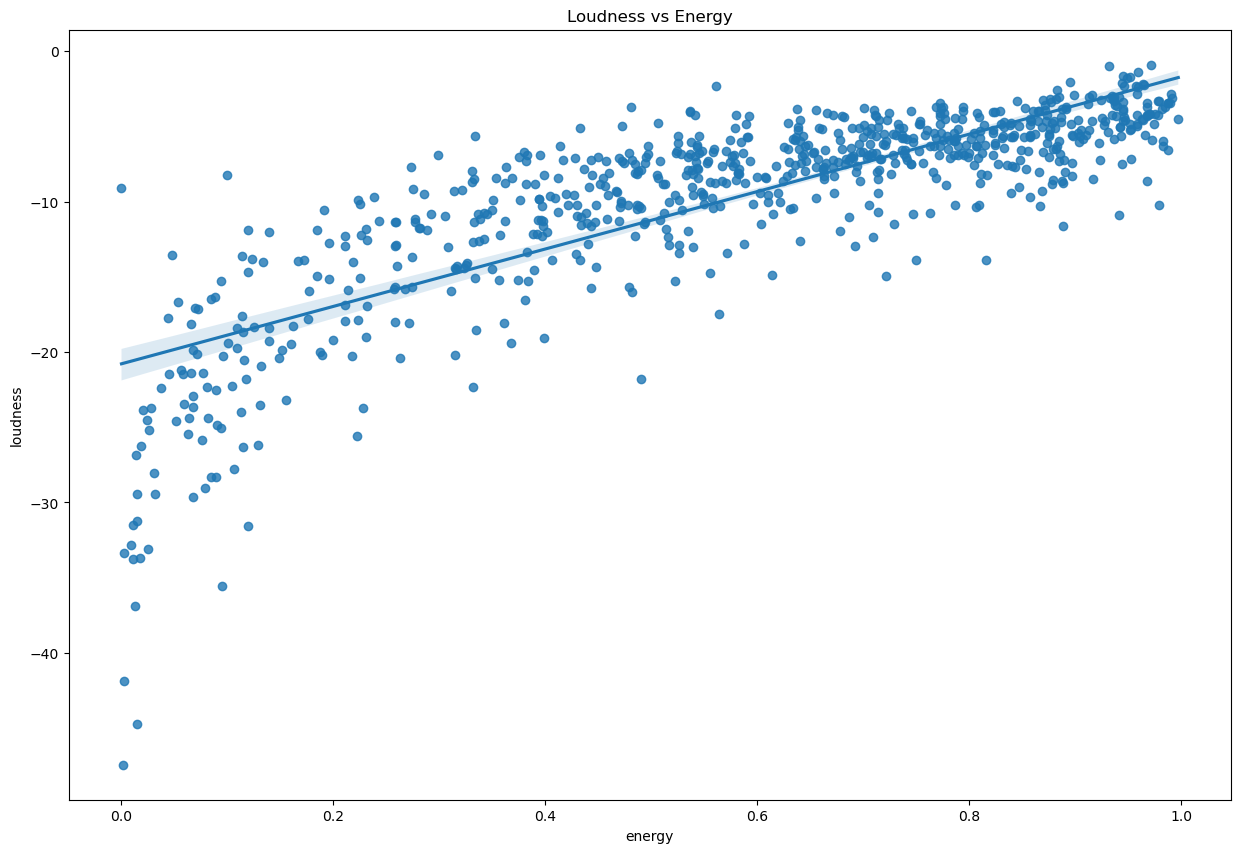

In [33]:
plt.figure(figsize=(15,10))
sns.regplot(data = spotify_sample, y= "loudness", x = "energy").set(title="Loudness vs Energy")

[Text(0.5, 1.0, 'popularity vs acousticness')]

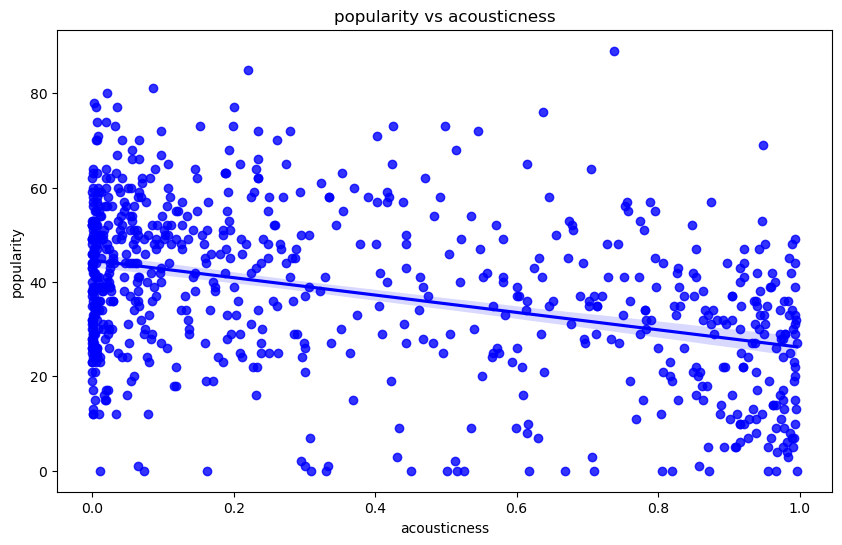

In [34]:
plt.figure(figsize=(10,6))
sns.regplot(data = spotify_sample, y= "popularity", x = "acousticness", color = "b").set(title="popularity vs acousticness")

[Text(0.5, 1.0, 'popularity vs acousticness')]

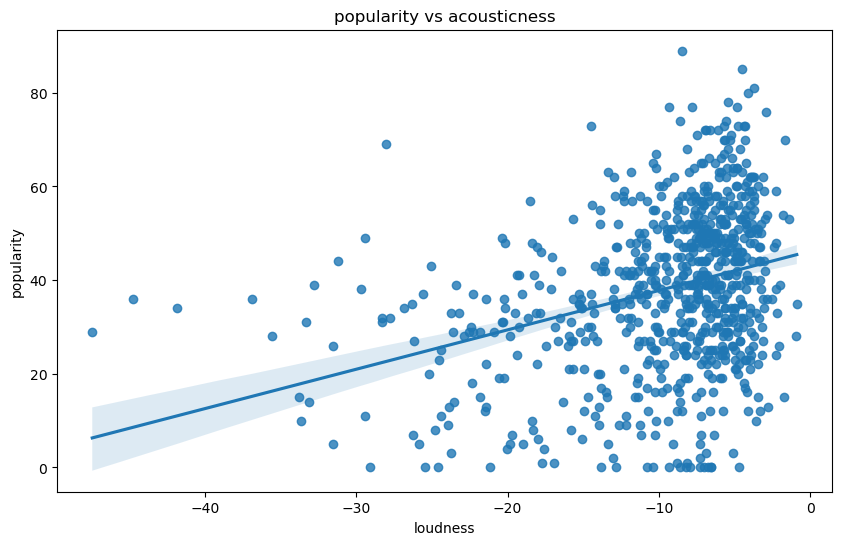

In [35]:
plt.figure(figsize=(10,6))
sns.regplot(data = spotify_sample, y= "popularity", x = "loudness").set(title="popularity vs acousticness")

In [38]:
spotify.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,13,0.234,0.617,0.862,0.976000,0.1410,-12.855,1,0.0514,129.578,...,0,0,0,0,0,0,0,0,1,0
1,5,0.249,0.518,0.805,0.000000,0.3330,-6.248,1,0.0407,79.124,...,0,0,0,0,0,0,1,0,0,0
2,30,0.366,0.631,0.513,0.000004,0.1090,-6.376,1,0.0293,120.365,...,0,0,0,1,0,0,0,0,0,0
3,39,0.815,0.768,0.137,0.922000,0.1130,-13.284,0,0.0747,76.430,...,0,0,1,0,0,0,0,0,0,0
4,70,0.131,0.748,0.627,0.000000,0.0852,-6.029,1,0.0644,120.963,...,0,0,0,0,0,0,0,0,1,0


<Axes: >

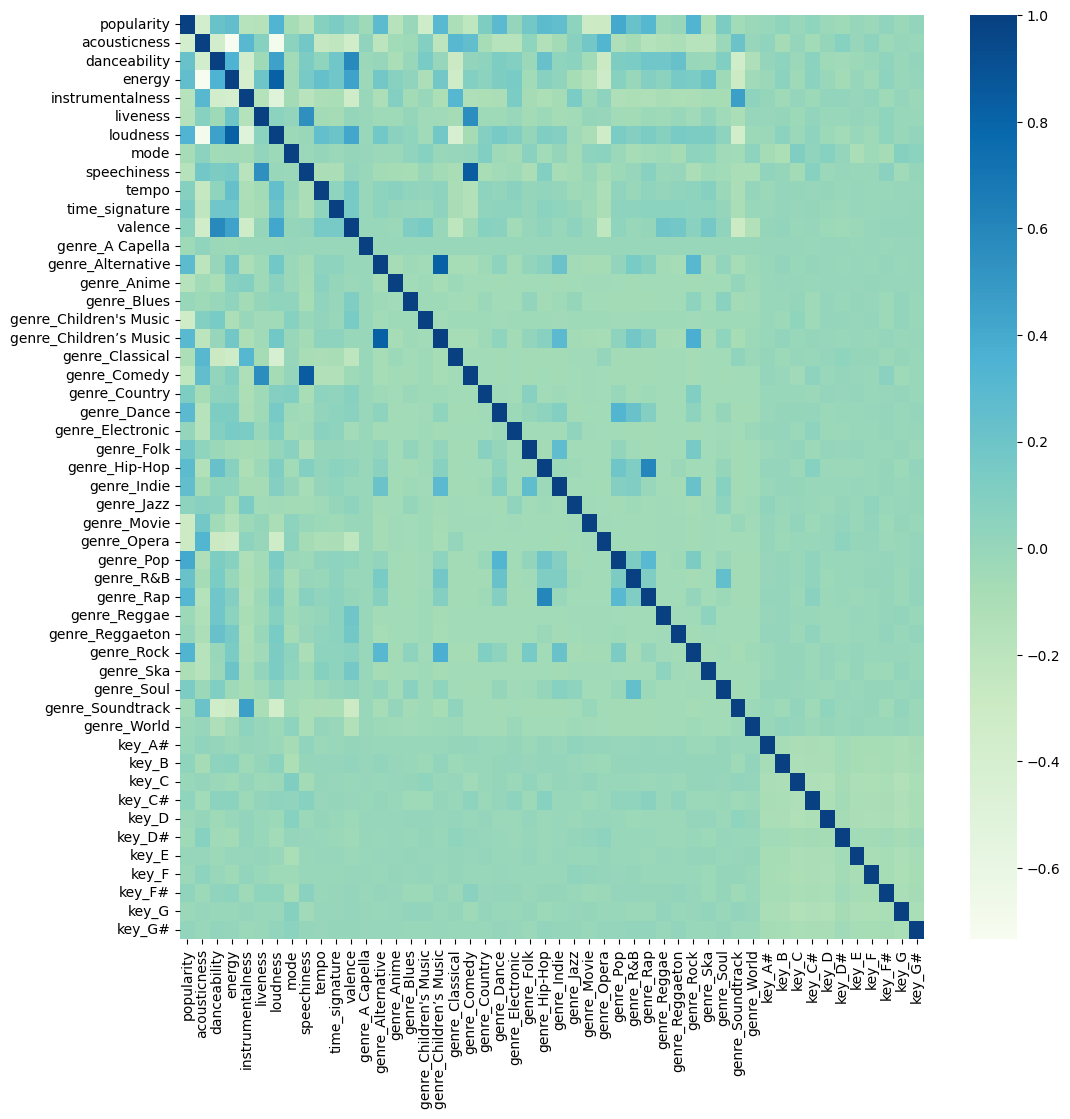

In [63]:
corr=spotify.corr()

#Plotting Correlation
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=False,cmap="GnBu")

In [64]:
spotify['loudness'].corr(spotify['popularity']).round(2)
print(f"Linear correlation is {a}")

Linear correlation is 0.34


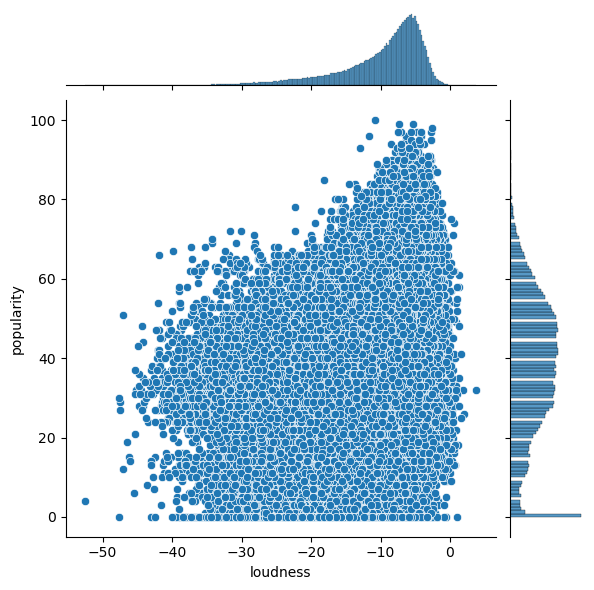

In [53]:
sns.jointplot(x='loudness', y='popularity', data=spotify)
plt.show()

In [5]:
spotify.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,13,0.234,0.617,0.862,0.976000,0.1410,-12.855,1,0.0514,129.578,...,0,0,0,0,0,0,0,0,1,0
1,5,0.249,0.518,0.805,0.000000,0.3330,-6.248,1,0.0407,79.124,...,0,0,0,0,0,0,1,0,0,0
2,30,0.366,0.631,0.513,0.000004,0.1090,-6.376,1,0.0293,120.365,...,0,0,0,1,0,0,0,0,0,0
3,39,0.815,0.768,0.137,0.922000,0.1130,-13.284,0,0.0747,76.430,...,0,0,1,0,0,0,0,0,0,0
4,70,0.131,0.748,0.627,0.000000,0.0852,-6.029,1,0.0644,120.963,...,0,0,0,0,0,0,0,0,1,0


In [6]:
spotify.columns

Index(['popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'time_signature', 'valence', 'genre_A Capella',
       'genre_Alternative', 'genre_Anime', 'genre_Blues',
       'genre_Children's Music', 'genre_Children’s Music', 'genre_Classical',
       'genre_Comedy', 'genre_Country', 'genre_Dance', 'genre_Electronic',
       'genre_Folk', 'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz',
       'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap',
       'genre_Reggae', 'genre_Reggaeton', 'genre_Rock', 'genre_Ska',
       'genre_Soul', 'genre_Soundtrack', 'genre_World', 'key_A#', 'key_B',
       'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#'],
      dtype='object')

In [10]:
features = ['popularity',
       'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 
       'speechiness', 'tempo', 'valence']

In [14]:
features_selected = spotify[features]

In [17]:
X = StandardScaler().fit_transform(features_selected)
X

array([[-1.39729097, -0.43076532,  0.39958265, ..., -0.3657715 ,
         0.38903677,  1.631629  ],
       [-1.85181432, -0.3895725 , -0.12647535, ..., -0.41973669,
        -1.22627915,  1.46210176],
       [-0.43142885, -0.06826851,  0.47397469, ..., -0.47723232,
         0.09407689, -0.54962145],
       ...,
       [-0.54505969, -0.76305407,  0.92564066, ...,  0.05586309,
         0.59685013,  0.343222  ],
       [ 1.67074164, -0.47745052,  0.64932736, ..., -0.47874536,
        -0.07611813, -0.87360684],
       [-0.2609826 , -0.99126229, -0.04676959, ..., -0.46058885,
        -1.4381585 ,  0.81413099]])

In [21]:
kmeans = KMeans(n_clusters=26)
model = kmeans.fit(X)
print("model\n", model)

C:\Users\praha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


model
 KMeans(n_clusters=26)


In [22]:
centers = model.cluster_centers_
centers

array([[-5.00677208e-01, -9.13502342e-01, -8.00306855e-01,
         1.15384361e+00, -3.98272387e-01,  3.60056598e-02,
         8.17644627e-01, -5.37060219e-02,  1.67622943e+00,
         2.19091297e-01],
       [ 3.66322172e-01,  6.49651588e-01,  6.47877171e-01,
        -4.09794843e-01, -4.36007387e-01, -3.01539167e-01,
        -8.77348841e-02, -2.31192081e-01, -3.63201498e-01,
         7.86089297e-01],
       [-1.66279221e-01, -5.67755074e-01,  1.16426098e+00,
         4.36230221e-01, -4.71160292e-01, -3.46837367e-01,
         4.53649715e-01, -8.63250658e-02, -5.30426163e-01,
         1.19180407e+00],
       [-1.34479575e+00,  1.37931393e+00, -8.53417068e-01,
        -1.40266793e+00, -3.58817645e-01, -2.79971807e-01,
        -1.15016299e+00, -3.24151849e-01,  7.13585684e-01,
        -7.30387316e-01],
       [ 4.40781031e-01, -8.79523348e-01, -3.96381592e-01,
         8.57422906e-01, -4.33329851e-01, -1.62715204e-01,
         7.12182565e-01, -1.92977770e-01, -7.35549131e-01,
        -3.

In [24]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [26]:
# Function that creates Parallel Plots

def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [27]:
P = pd_centers(features, centers)
P

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,prediction
0,-0.500677,-0.913502,-0.800307,1.153844,-0.398272,0.036006,0.817645,-0.053706,1.676229,0.219091,0
1,0.366322,0.649652,0.647877,-0.409795,-0.436007,-0.301539,-0.087735,-0.231192,-0.363201,0.786089,1
2,-0.166279,-0.567755,1.164261,0.436230,-0.471160,-0.346837,0.453650,-0.086325,-0.530426,1.191804,2
3,-1.344796,1.379314,-0.853417,-1.402668,-0.358818,-0.279972,-1.150163,-0.324152,0.713586,-0.730387,3
4,0.440781,-0.879523,-0.396382,0.857423,-0.433330,-0.162715,0.712183,-0.192978,-0.735549,-0.305141,4
5,-0.391616,1.497844,-1.588486,-1.898613,2.131766,-0.502116,-2.953691,-0.395624,-1.023979,-1.296904,5
6,0.930196,-0.627680,1.180475,0.129842,-0.476870,-0.301301,0.444942,0.300609,0.620540,-0.192541,6
7,-0.468400,1.127930,-1.691528,-1.301157,2.128667,-0.379846,-1.129672,-0.419821,-1.071695,-1.341794,7
8,-1.291545,1.484928,-1.385912,-1.562727,-0.340269,-0.290280,-1.562988,-0.350210,-1.033944,-1.150523,8
9,-1.212311,1.068414,0.383346,-0.587479,-0.514424,1.299372,-1.019544,3.771103,-0.581150,0.236829,9


In [30]:
P.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,26.0,-0.192613,0.796250,-1.845965,-0.700961,-0.136525,0.354057,1.177908
acousticness,26.0,0.211129,0.949391,-0.913502,-0.643628,0.049127,1.140713,1.497844
danceability,26.0,-0.129970,0.833140,-1.691528,-0.704565,-0.112132,0.579371,1.180475
energy,26.0,-0.182429,0.933156,-1.898613,-0.960987,0.004146,0.679853,1.153844
instrumentalness,26.0,0.144540,1.065437,-0.520267,-0.461567,-0.428137,-0.219588,2.131766
liveness,26.0,0.100770,0.966661,-0.502116,-0.346006,-0.285126,-0.165032,2.843762
loudness,26.0,-0.202150,0.943829,-2.953691,-0.883536,0.020152,0.494566,0.817645
speechiness,26.0,0.085658,1.118074,-0.419821,-0.343055,-0.217101,-0.099914,3.920736
tempo,26.0,0.000800,0.787797,-1.071695,-0.637939,-0.107293,0.664317,1.676229
valence,26.0,-0.110708,0.807101,-1.341794,-0.721848,-0.248841,0.555210,1.263862


NameError: name 'parallel_coordinates' is not defined

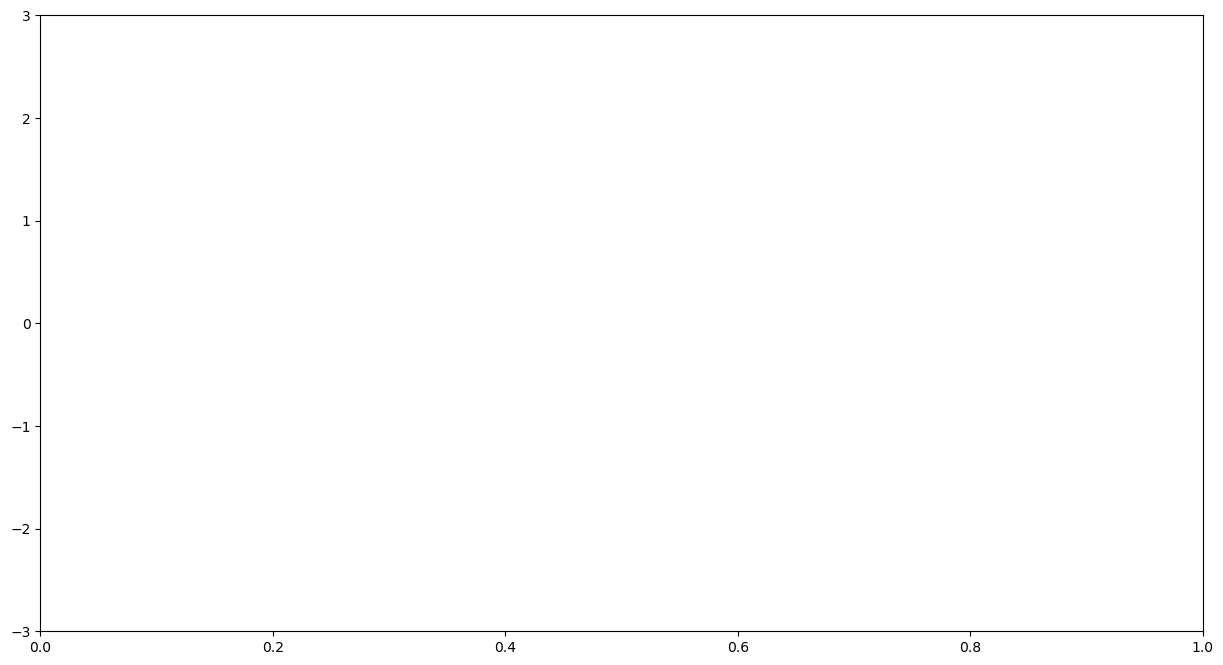

In [33]:
parallel_plot(P[P['popularity'] > 0.8])